In [1]:
import os, sys, time
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from importlib import reload

from data.generated.generated_data import get_noisy_nonlinear_with_non_noisy_labels

import pickle
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import homogeneity_score


from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
from yellowbrick.cluster.elbow import KElbowVisualizer

import common

title_fontsize = 24
fontsize = 24
legend_fontsize = 18
default_figure_size = (15, 8)

DATASET = "Generated Non-Linear"

In [2]:
X_train_gnnl, X_test_gnnl, y_train_gnnl, y_test_gnnl, y_test_non_noisy_gnnl =\
get_noisy_nonlinear_with_non_noisy_labels()

num_features = X_train_gnnl.shape[1]
n = 21

In [3]:
reload(common)
distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times =\
common.compute_kmeans_scores(X_train_gnnl, n)

For n_clusters = 2 average silhouette_score: 0.6530824589160924 time taken: 0.1600959300994873s
For n_clusters = 3 average silhouette_score: 0.5361462140386664 time taken: 0.08000850677490234s
For n_clusters = 4 average silhouette_score: 0.4954286044351487 time taken: 0.1175234317779541s
For n_clusters = 5 average silhouette_score: 0.510692295450492 time taken: 0.1683969497680664s
For n_clusters = 6 average silhouette_score: 0.5144103071360783 time taken: 0.139678955078125s
For n_clusters = 7 average silhouette_score: 0.37788959909813097 time taken: 0.12956547737121582s
For n_clusters = 8 average silhouette_score: 0.3914959334013555 time taken: 0.1217494010925293s
For n_clusters = 9 average silhouette_score: 0.37912043058031814 time taken: 0.16254210472106934s
For n_clusters = 10 average silhouette_score: 0.3405351256091486 time taken: 0.18904781341552734s
For n_clusters = 11 average silhouette_score: 0.3623020078952437 time taken: 0.19252896308898926s
For n_clusters = 12 average silho

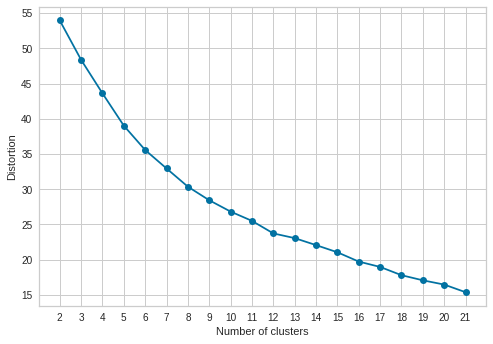

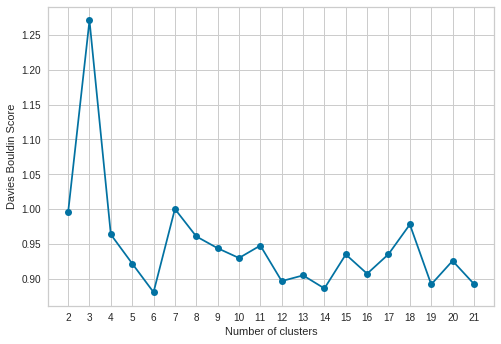

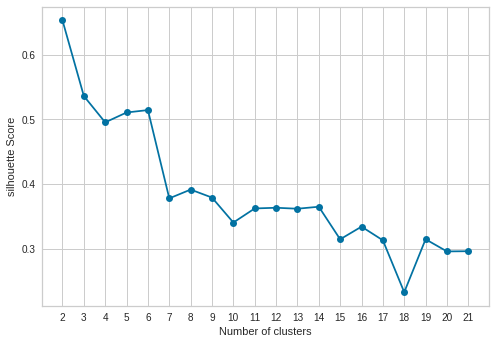

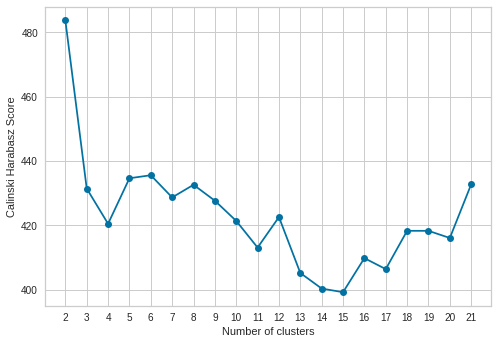

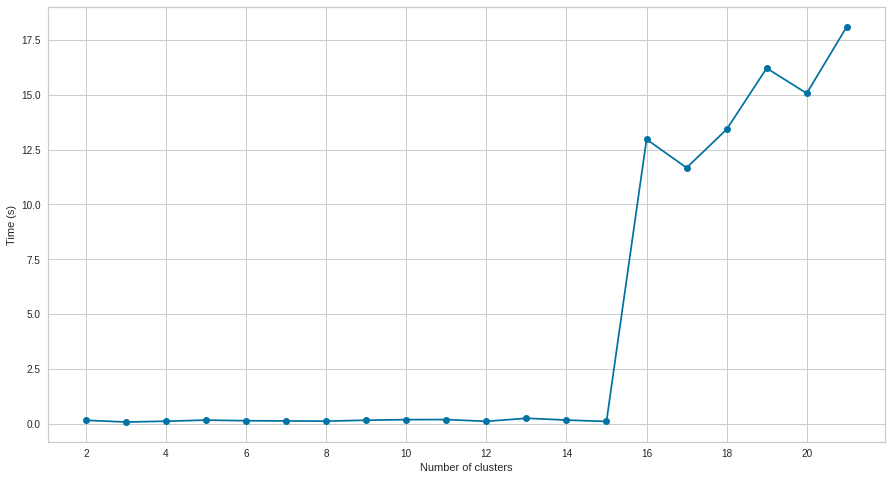

In [6]:
# plot
plt.plot(range(2, n+1), distortions, marker='o')
plt.xticks(range(2, n+1))
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# plot
plt.plot(range(2, n+1), davies_bouldin_scores, marker='o')
plt.xticks(range(2, n+1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()

# plot
plt.plot(range(2, n+1), silhouette_scores, marker='o')
plt.xticks(range(2, n+1))
plt.xlabel('Number of clusters')
plt.ylabel('silhouette Score')
plt.show()
                    
# plot
plt.plot(range(2, n+1), calinski_harabasz_scores, marker='o')
plt.xticks(range(2, n+1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski Harabasz Score')
plt.show()

# plot
plt.figure(figsize=default_figure_size)
plt.plot(range(2, n+1), times, marker='o')
plt.xticks(range(2, n+1, 2))
plt.xlabel('Number of clusters')
plt.ylabel('Time (s)')
plt.show()

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


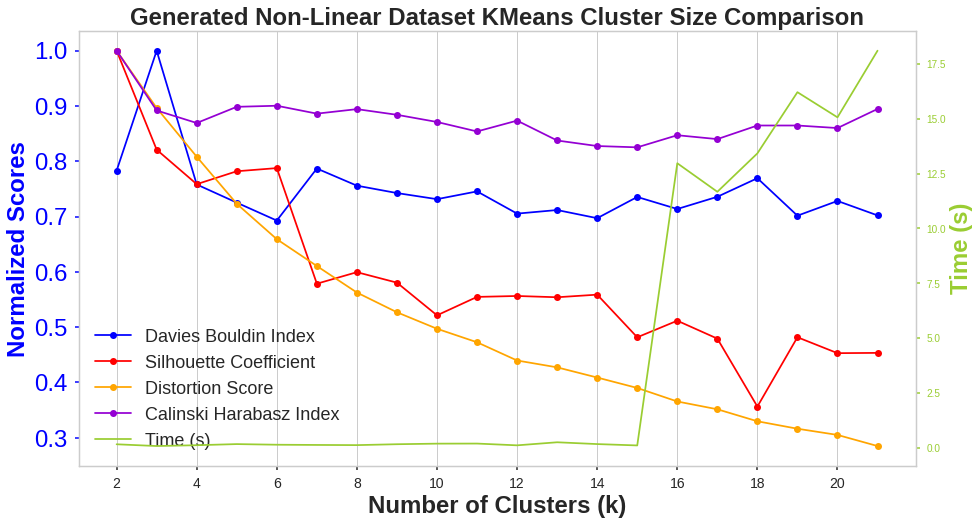

In [9]:
reload(common)
common.plot_kmeans_all(distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:109: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


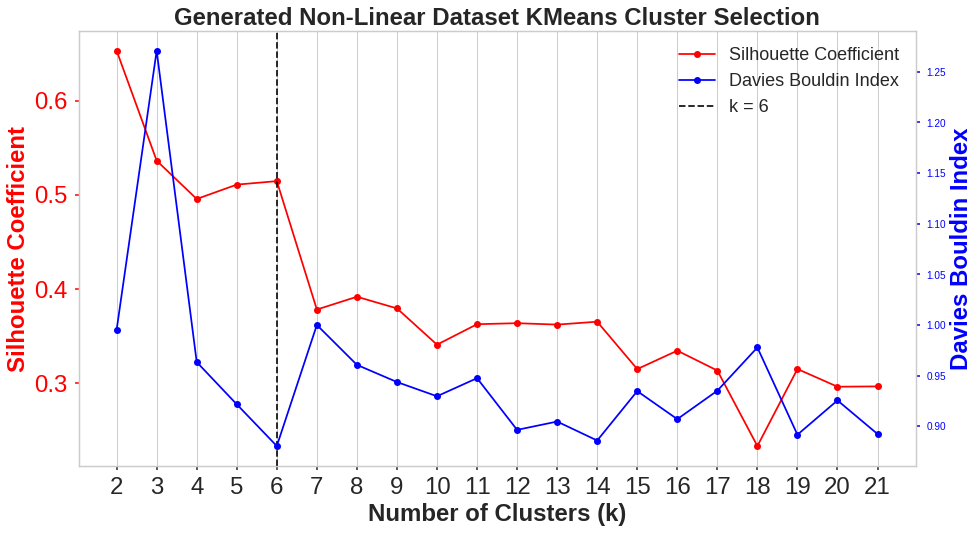

Best Silhouette Score: 0.5144103071360783


In [10]:
reload(common)
best_k = 6
common.plot_kmeans_selection(davies_bouldin_scores, silhouette_scores, best_k=best_k, DATASET=DATASET, tick_spacing=1)
print("Best Silhouette Score: {}".format(silhouette_scores[best_k-2]))

For n_clusters = 6 average silhouette_score: 0.5144103071360783 time taken: 0.15630841255187988s


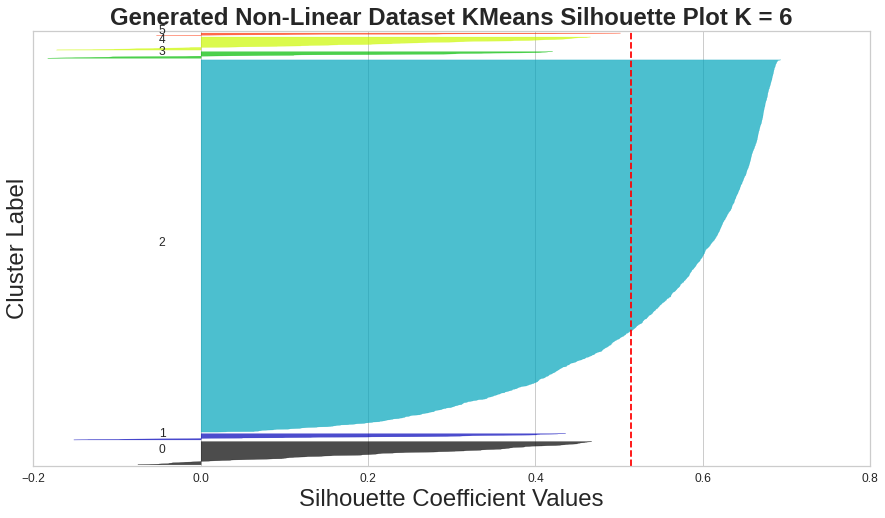

In [11]:
reload(common)
common.plot_silhouette_kmeans(X_train_gnnl, best_k, DATASET, xlim=[-0.2, 0.8])

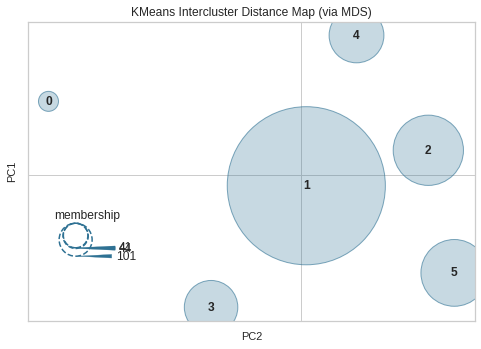

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [12]:
# Instantiate the clustering model and visualizer
model = KMeans(best_k)
visualizer = InterclusterDistance(model)

visualizer.fit(X_train_gnnl)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [13]:
y_train_gnnl_df = pd.DataFrame(y_train_gnnl, columns=["data_labels"])
X_train_gnnl_df = pd.DataFrame(X_train_gnnl)

In [14]:
start_time = time.time()
km = KMeans(n_clusters=best_k, **common.km_arguements)
km.fit(X_train_gnnl)
end_time = time.time()
print("Time Taken {} s".format(end_time - start_time))
y_train_gnnl_df['km_labels']=km.labels_
X_train_gnnl_df['km_labels'] = km.labels_
X_train_gnnl_df['original_labels'] = y_train_gnnl

print("homogeneity_score: ", homogeneity_score(km.labels_, y_train_gnnl))
print("Silhouette Score: {}".format(silhouette_score(X_train_gnnl, km.labels_)))

Time Taken 0.11377120018005371 s
homogeneity_score:  0.006443812084578425
Silhouette Score: 0.5144103071360783


In [15]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(X_train_gnnl)
y_train_gnnl_df['x'] = tsne_features[:,0]
y_train_gnnl_df['y'] = tsne_features[:,1]

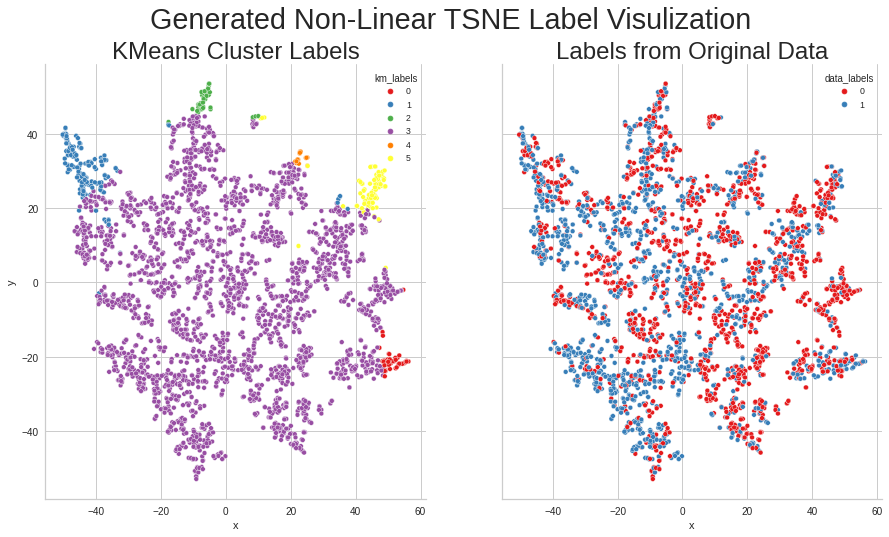

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=default_figure_size, sharey=True)

sns.set_context("paper", rc={"font.size": fontsize, "axes.titlesize": fontsize, "axes.labelsize": fontsize})

sns.scatterplot(x="x", y="y", hue="km_labels", data=y_train_gnnl_df, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="data_labels", data=y_train_gnnl_df, palette="Set1", ax=ax2)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("KMeans Cluster Labels")
ax2.set_title("Labels from Original Data")
sns.despine(fig)

plt.show()

Text(0.5, 1.05, 'Generated Non-Linear Data Set\nK-Means Cluster Labels Pair Plot')

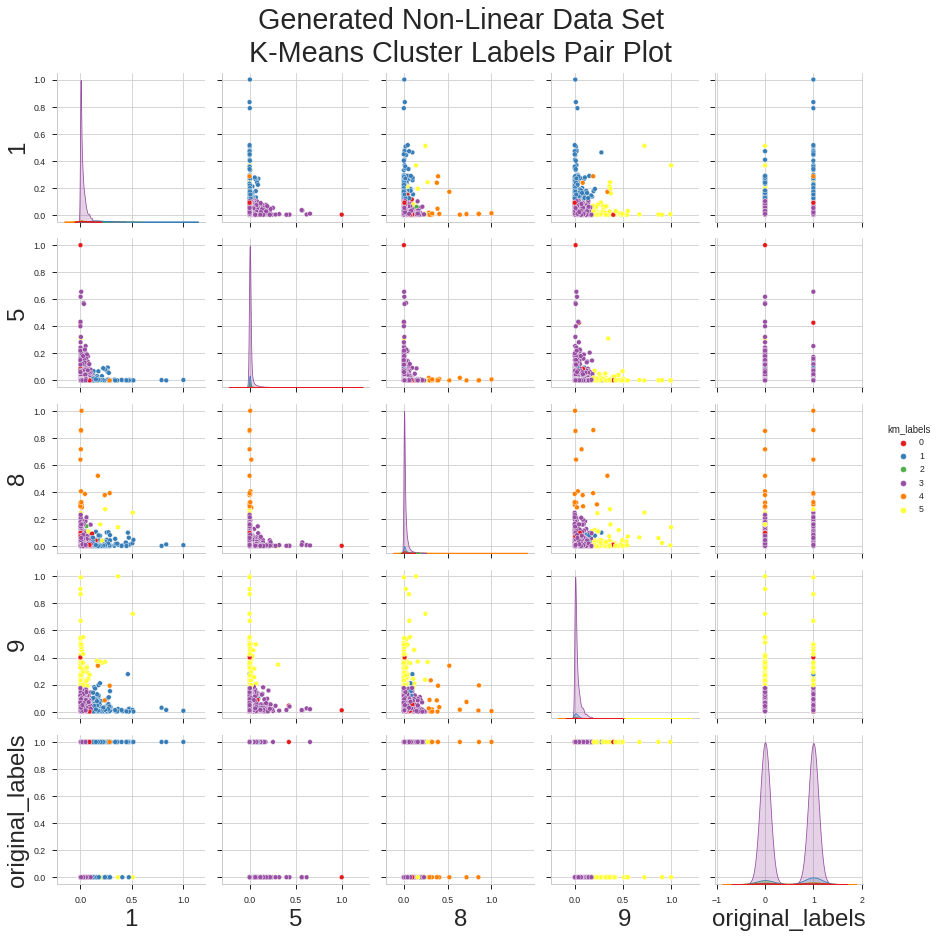

In [17]:
g = sns.pairplot(X_train_gnnl_df[[1,5,8,9, 'original_labels', 'km_labels']], hue="km_labels", palette="Set1")
g.fig.suptitle("{} Data Set\nK-Means Cluster Labels Pair Plot".format(DATASET), y=1.05)

# Expectation Maximization

In [18]:
reload(common)
n_components = np.arange(2, n+1)
davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em =\
common.compute_em_scores(X_train_gnnl, n)

For n_clusters = 2 average silhouette_score: 0.3084717431863761 time taken: 0.3691561222076416s
For n_clusters = 3 average silhouette_score: 0.31646085051106665 time taken: 0.4607110023498535s
For n_clusters = 4 average silhouette_score: 0.10747506151679967 time taken: 0.5866143703460693s
For n_clusters = 5 average silhouette_score: 0.03449007708776571 time taken: 0.9667303562164307s
For n_clusters = 6 average silhouette_score: -0.018848960966120123 time taken: 1.4628162384033203s
For n_clusters = 7 average silhouette_score: -0.06349279929933092 time taken: 1.124258279800415s
For n_clusters = 8 average silhouette_score: -0.03485228003047707 time taken: 0.8534390926361084s
For n_clusters = 9 average silhouette_score: -0.03837867469846562 time taken: 0.7876765727996826s
For n_clusters = 10 average silhouette_score: -0.05074803606600073 time taken: 1.376406192779541s


/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/mixture/_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


For n_clusters = 11 average silhouette_score: -0.06155810051744109 time taken: 3.639296531677246s
For n_clusters = 12 average silhouette_score: -0.08077912701035796 time taken: 0.876190185546875s
For n_clusters = 13 average silhouette_score: -0.08181025855160201 time taken: 1.408545970916748s
For n_clusters = 14 average silhouette_score: -0.09220712096595812 time taken: 1.3850054740905762s
For n_clusters = 15 average silhouette_score: -0.093743340766958 time taken: 1.7893664836883545s
For n_clusters = 16 average silhouette_score: -0.0942642959036557 time taken: 2.5092928409576416s
For n_clusters = 17 average silhouette_score: -0.08680338070631556 time taken: 2.6985864639282227s
For n_clusters = 18 average silhouette_score: -0.08525514266890749 time taken: 2.759002685546875s
For n_clusters = 19 average silhouette_score: -0.09472023715247681 time taken: 3.2400848865509033s
For n_clusters = 20 average silhouette_score: -0.09130956817430688 time taken: 3.326960563659668s
For n_clusters = 2

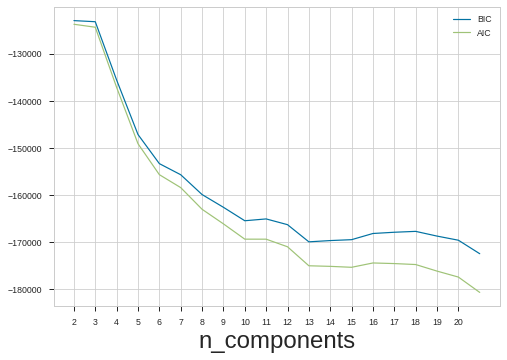

In [19]:
plt.plot(n_components, bic_scores_em, label='BIC')
plt.plot(n_components, aic_scores_em, label='AIC')
plt.legend(loc='best')
plt.xticks(range(2, max(n_components), 1))
plt.xlabel('n_components');

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:250: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


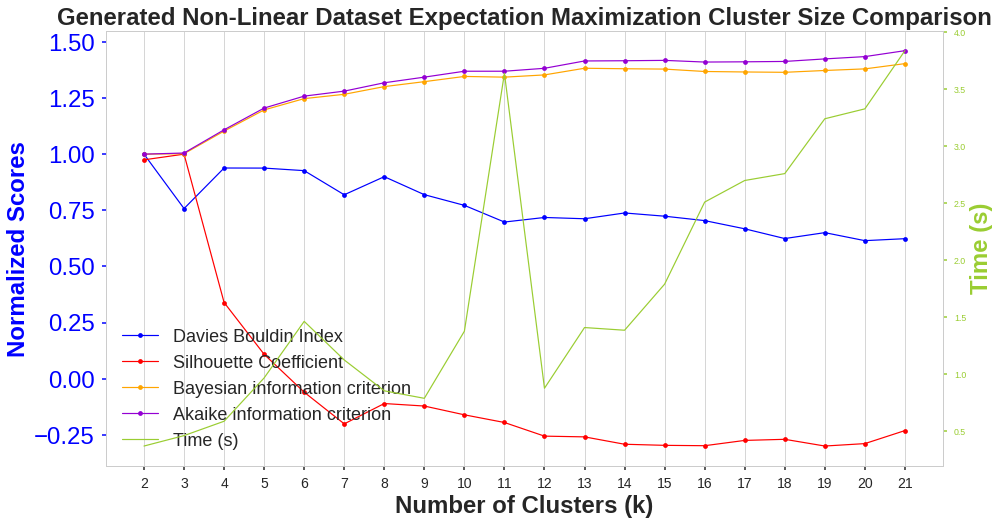

In [20]:
reload(common)
common.plot_em_all(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:301: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


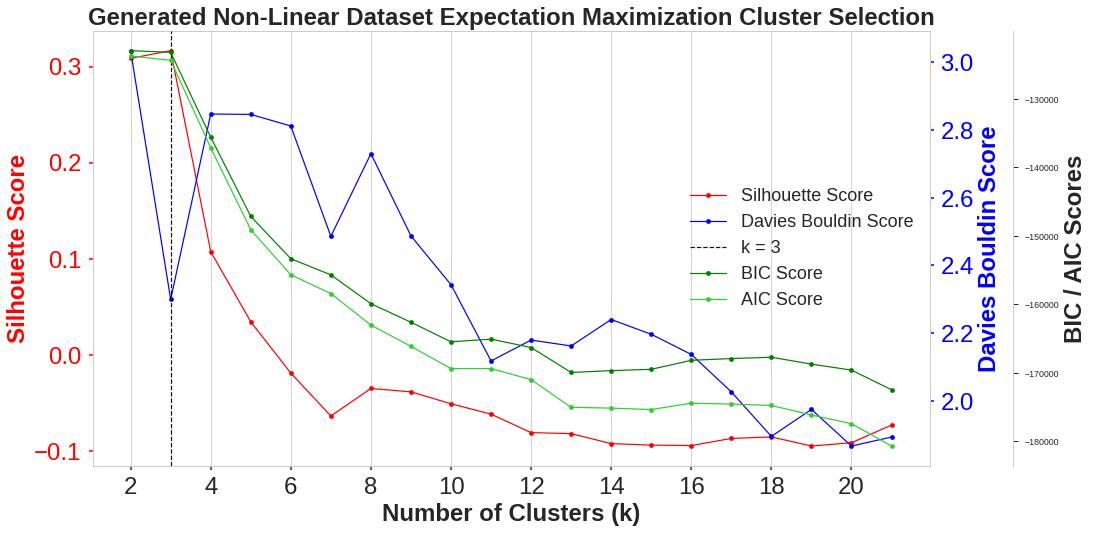

In [21]:
reload(common)
best_k = 3
common.plot_em_selection(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, best_k, DATASET, tick_spacing=2)
print("")

For n_clusters = 3 average silhouette_score: 0.31646085051106665 time taken: 0.41095638275146484s


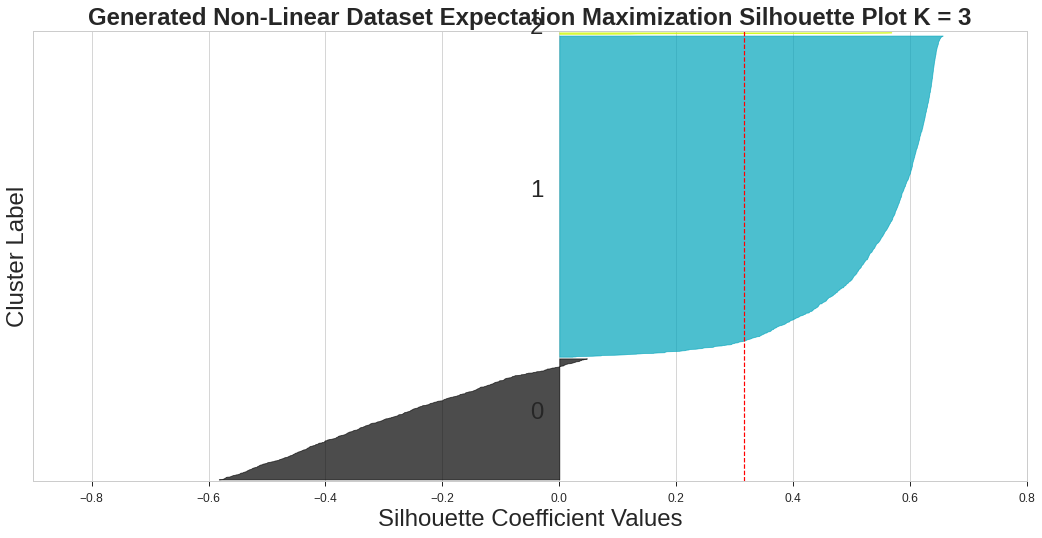

Best Silhouette Score: 0.31646085051106665


In [22]:
reload(common)
common.plot_silhouette_em(X_train_gnnl, best_k, DATASET, xlim=[-0.9, 0.8])
print("Best Silhouette Score: {}".format(silhouette_scores_em[best_k-2]))

In [23]:
y_train_gnnl_df = pd.DataFrame(y_train_gnnl, columns=["data_labels"])
X_train_gnnl_df = pd.DataFrame(X_train_gnnl)

In [24]:
start_time = time.time()
em_model = GaussianMixture(best_k, **common.em_arguements)
em_model.fit(X_train_gnnl)
end_time = time.time()
print("time taken {} s".format(end_time-start_time))
y_train_gnnl_df['em_labels']=em_model.predict(X_train_gnnl)
X_train_gnnl_df['em_labels'] = em_model.predict(X_train_gnnl)
X_train_gnnl_df['original_labels'] = y_train_gnnl

print("homogeneity_score: ", homogeneity_score(em_model.predict(X_train_gnnl), y_train_gnnl))
print("Silhouette Score: {}".format(silhouette_score(X_train_gnnl, em_model.predict(X_train_gnnl))))

time taken 0.4343838691711426 s
homogeneity_score:  0.0012568267024589497
Silhouette Score: 0.31646085051106665


In [25]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(X_train_gnnl)
y_train_gnnl_df['x'] = tsne_features[:,0]
y_train_gnnl_df['y'] = tsne_features[:,1]

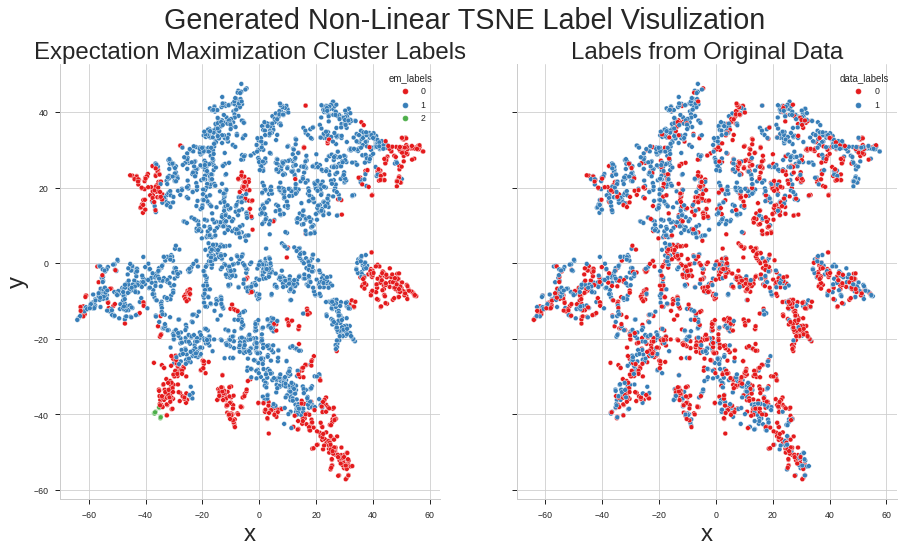

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=default_figure_size, sharey=True)

sns.set_context("paper", rc={"font.size": fontsize, "axes.titlesize": fontsize, "axes.labelsize": fontsize})

sns.scatterplot(x="x", y="y", hue="em_labels", data=y_train_gnnl_df, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="data_labels", data=y_train_gnnl_df, palette="Set1", ax=ax2)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("Expectation Maximization Cluster Labels")
ax2.set_title("Labels from Original Data")
sns.despine(fig)

plt.show()

Text(0.5, 1.05, 'Generated Non-Linear Data Set\nExpectation Maximization Cluster Labels Pair Plot')

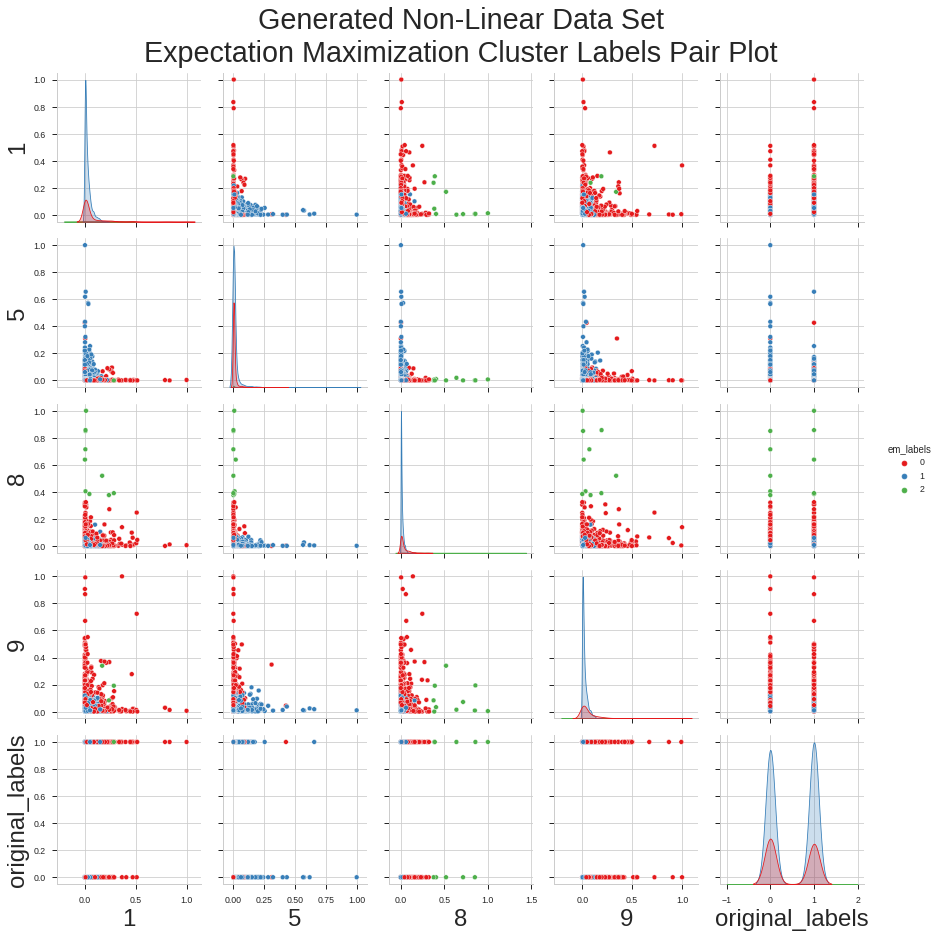

In [27]:
g = sns.pairplot(X_train_gnnl_df[[1,5,8,9, 'original_labels', 'em_labels']], hue="em_labels", palette="Set1")
g.fig.suptitle("{} Data Set\nExpectation Maximization Cluster Labels Pair Plot".format(DATASET), y=1.05)